In [5]:
import pandas as pd
import requests
import zipfile
import pathlib as p

import matplotlib.pyplot as plt
import scipy.interpolate as interp
import numpy as np

In [6]:
def get_rain_data (date):

    rain_data_url=f"https://odp.met.hu/weather/weather_reports/synoptic/hungary/daily_rain/csv/HABP_1RD_{date}.csv.zip"
    dir_path=f"../data/local/rain_data/{date}"
    file_path=f"../data/local/rain_data/{date}/HABP_1RD_{date}.csv.zip"

    p.Path(dir_path).mkdir(exist_ok=True)

    rain_data = requests.get(rain_data_url)
    with open(file_path, "wb")as file:
        file.write(rain_data.content)

    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(dir_path)

    rain_df = pd.read_csv(file_path,delimiter=";")
    return rain_df

In [27]:
date="20211229"

rain_df=get_rain_data(date)
rain_df.head()

,Time,StationNumber,StationName,Latitude,Longitude,Elevation,r,Q_r,rh,Q_rh,EOR
0,20211229,13710,Fertőrákos,47.7167,16.6500,120.0,2.8,,0,,EOR
1,20211229,13713,Sopron Meteorológia,47.6783,16.6025,233.5,3.5,,0,,EOR
2,20211229,14201,Sopron Brennbergbánya,47.6500,16.4833,430.0,3.1,,0,,EOR
3,20211229,14421,Fertőszentmiklós,47.5953,16.8625,128.0,3.8,,0,,EOR
4,20211229,14422,Fertőhomok,47.6214,16.7689,120.0,2.7,,0,,EOR


In [28]:
rain_df.columns

Index(['    Time', 'StationNumber', 'StationName                             ',
       'Latitude', 'Longitude', 'Elevation', '     r', ' Q_r', '  rh', 'Q_rh',
       'EOR'],
      dtype='object')

In [29]:
rain_df[rain_df["     r"]<0].head()

,Time,StationNumber,StationName,Latitude,Longitude,Elevation,r,Q_r,rh,Q_rh,EOR
7,20211229,14706,Sopronhorpács,47.4814,16.7292,197.9,-999.0,,0,,EOR
8,20211229,14801,Csepreg,47.4058,16.6986,172.0,-999.0,,0,,EOR
13,20211229,15315,Táplánszentkereszt,47.2011,16.6922,193.3,-999.0,,0,,EOR
14,20211229,15604,Pinkamindszent,47.0333,16.4833,205.0,-999.0,,0,,EOR
21,20211229,16302,Hagyárosbörönd,46.9167,16.7000,205.0,-999.0,,0,,EOR


In [30]:
rain_df=rain_df[rain_df["     r"]>=0]

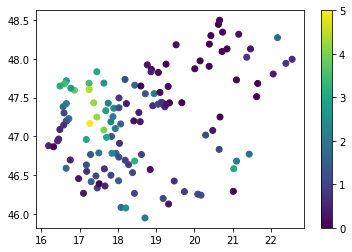

In [31]:
plt.scatter(rain_df["Longitude"],rain_df["Latitude"],c=rain_df["     r"])
plt.colorbar()


### Interpolation of the rain data
2D data --> f_rain (lat, long) = r

In [32]:
x=rain_df["Longitude"]
y=rain_df["Latitude"]
z=rain_df["     r"]

interpolator = interp.CloughTocher2DInterpolator(list(zip(x, y)), z)
interpolator_lin = interp.LinearNDInterpolator(list(zip(x, y)), z)
interpolator_NN = interp.NearestNDInterpolator(list(zip(x, y)), z)
interpolator_RBF = interp.RBFInterpolator(list(zip(x, y)), z)




In [33]:
X = np.linspace(min(x), max(x), 500)
Y = np.linspace(min(y), max(y), 500)

X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
# interpolate z data; same shape as xgrid and ygrid

Z = interpolator(X, Y)




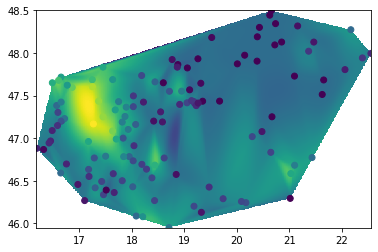

In [34]:
plt.pcolormesh(X, Y, Z, shading='auto')
plt.scatter(x,y,c=z)

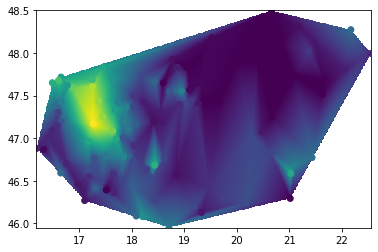

In [35]:
Z_lin=interpolator_lin(X,Y)
plt.pcolormesh(X, Y, Z_lin, shading='auto')
plt.scatter(x,y,c=z)

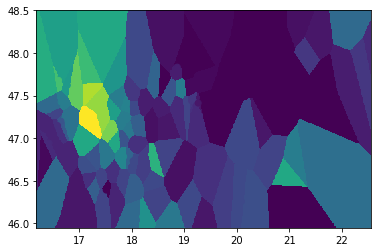

In [36]:
Z_NN=interpolator_NN(X,Y)
plt.pcolormesh(X, Y, Z_NN, shading='auto')
plt.scatter(x,y,c=z)

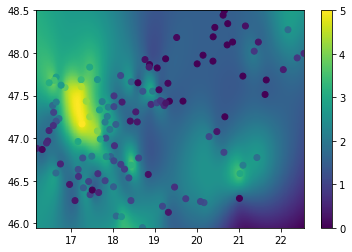

In [38]:

Z_RBF=interpolator_RBF(np.array([X,Y]).reshape(2, -1).T)
plt.pcolormesh(X, Y, Z_RBF.reshape(500, 500), shading='auto')
plt.scatter(x,y,c=z)
plt.colorbar()

In [ ]:
y